In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Segmentation

In [11]:
data = pd.read_csv('Compiled_data.csv')

In [12]:
data.shape

(348160, 3)

In [13]:
data.head()

,Unnamed: 0,0,1
0,0,17.996563,-29.527600
1,1,9.102498,-35.406930
2,2,7.620153,-38.346595
3,3,7.620153,-38.346595
4,4,4.655465,-38.346595


In [14]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,0,1
0,17.996563,-29.527600
1,9.102498,-35.406930
2,7.620153,-38.346595
3,7.620153,-38.346595
4,4.655465,-38.346595


In [8]:
#data = data.to_numpy()

In [15]:
Segment_lenth = 1024
number_of_segments = len(data)/Segment_lenth
number_of_segments

340.0

In [16]:
seg = int(number_of_segments)

## Features Calculatiion

In [17]:
def skewness(x):
    """Calculate skewness taking x as input."""
    N = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / N
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [18]:
def kurtosis(x):
    """Calculate Kurtosis taking x as input"""
    N = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / N
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [19]:
def shape_factor(x):
   
    rms = np.sqrt(((tds**2).sum())/len(x))
    denominator = sum(list(map(abs,x)))/len(x)
    return rms/mean

In [18]:
rms = []
kurt = []
skew = []
pp = []
crest = []
mean = []
sd = []
sf = []
for j in range(2,19):                                        ## Taking all the files
    file = pd.read_csv(str(j)+ ".txt",sep='\s+', header=None)
    td = file[1]   

    for i in range(20):                                  ## Calulation features of each segments
        segmented_data = td[i*1024:(i+1)*1024]
        tds = segmented_data
        tds = tds*(1000/0.215)
        rms.append(np.sqrt(((tds**2).sum())/1024))
        kurt.append(kurtosis(tds))
        skew.append(skewness(tds))
        pp.append(max(tds) - min(tds))
        crest.append(max(tds)/(np.sqrt(((tds**2).sum())/1024)))
        mean.append(tds.mean())
        sd.append(tds.std())
        sf.append(shape_factor(tds))
        


##  Features Visualization

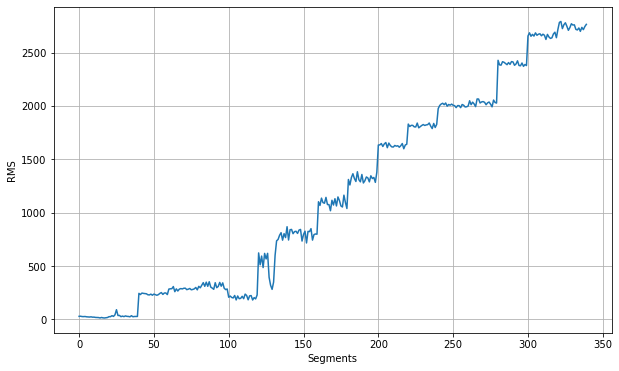

In [19]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(rms)
plt.xlabel('Segments')
plt.ylabel('RMS')
plt.grid(True)
plt.show()

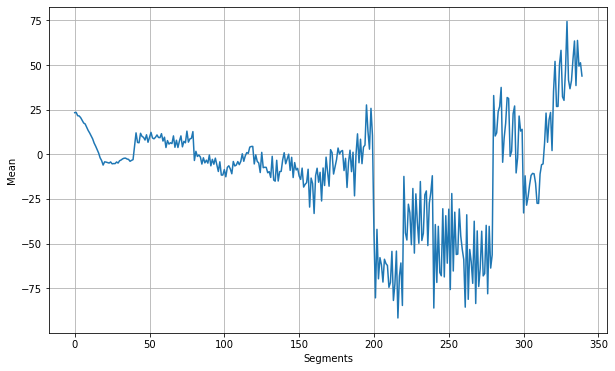

In [20]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(mean)
plt.xlabel('Segments')
plt.ylabel('Mean')
plt.grid(True)
plt.show()

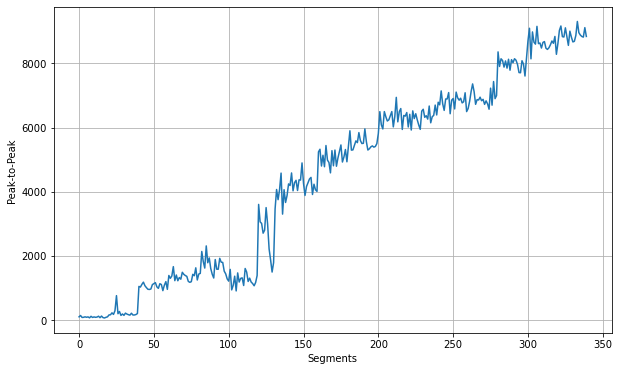

In [21]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(pp)
plt.xlabel('Segments')
plt.ylabel('Peak-to-Peak')
plt.grid(True)
plt.show()

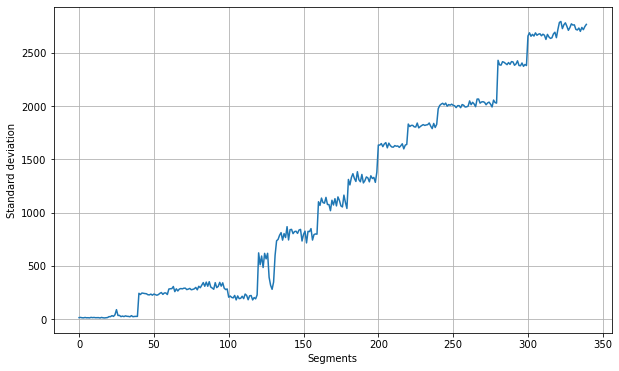

In [22]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(sd)
plt.xlabel('Segments')
plt.ylabel('Standard deviation')
plt.grid(True)
plt.show()

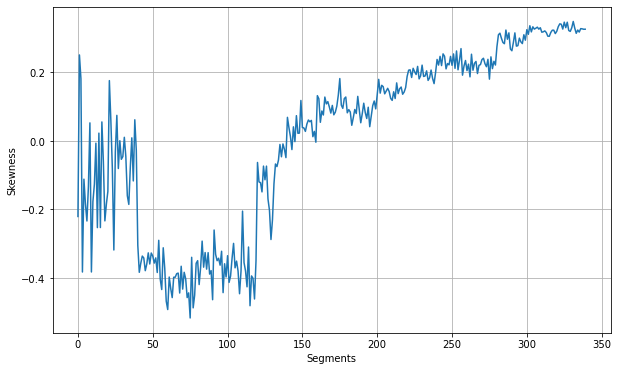

In [23]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(skew)
plt.xlabel('Segments')
plt.ylabel('Skewness')
plt.grid(True)
plt.show()

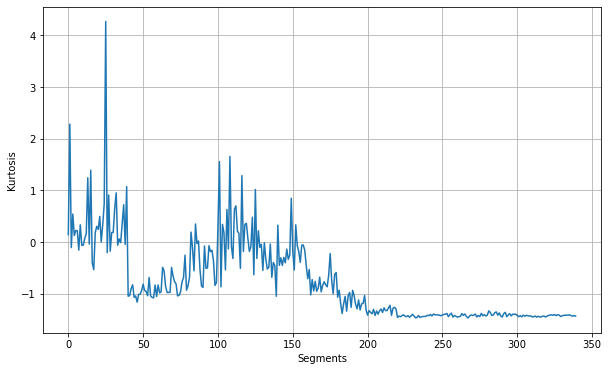

In [24]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(kurt)
plt.xlabel('Segments')
plt.ylabel('Kurtosis')
plt.grid(True)
plt.show()

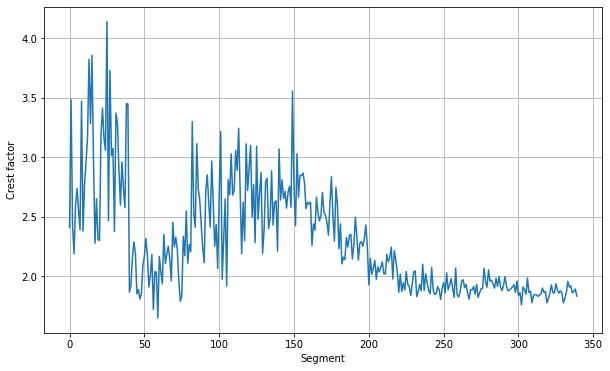

In [25]:
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(crest)
plt.xlabel('Segment')
plt.ylabel('Crest factor')
plt.grid(True)
plt.show()

In [26]:
'''
num = np.arange(1,seg +1)
plt.figure(figsize=(10,6))

plt.plot(sf)
plt.xlabel('Segment')
plt.ylabel('Shape Factor')
plt.grid(True)
plt.show()
'''

"\nnum = np.arange(1,seg +1)\nplt.figure(figsize=(10,6))\n\nplt.plot(sf)\nplt.xlabel('Segment')\nplt.ylabel('Shape Factor')\nplt.grid(True)\nplt.show()\n"

## Labeling of data

In [27]:
stable  = ['stable']*120
transition = ['transition']*100
unstable = ['unstable']*120

status = stable + transition + unstable

In [28]:
features = pd.DataFrame(list(zip(mean,sd,rms,pp,kurt,skew,crest,sf,status)),
               columns =['Mean','SD','RMS','Peak-to-Peak', 'Kurtosis',  'Skewness', 'Crest','shape_factor' ,'Status'])

In [29]:
#features = features.drop(['Kurtosis', 'Crest'], axis = 1)

features = features.drop(['shape_factor'],axis =1)

#features = features.drop(['Peak-to-Peak'],axis =1)

#features = features.drop(['Mean'],axis =1)

#features = features.drop(['Skewness'],axis =1)

#features = features.drop(['SD'],axis =1)

In [42]:
features.head()

,Mean,SD,RMS,Peak-to-Peak,Kurtosis,Skewness,Crest,Status
0,23.335318,15.047893,27.762475,99.317060,0.143753,-0.220421,2.410229,stable
1,23.490211,17.022671,29.004799,140.822698,2.281786,0.251258,3.482453,stable
2,21.615567,13.863735,25.675829,80.046586,-0.107346,0.181700,2.432906,stable
3,21.496864,13.070224,25.155101,84.493619,0.541329,-0.382638,2.188628,stable
4,20.521180,16.470847,26.308605,99.317060,0.126628,-0.111501,2.599768,stable


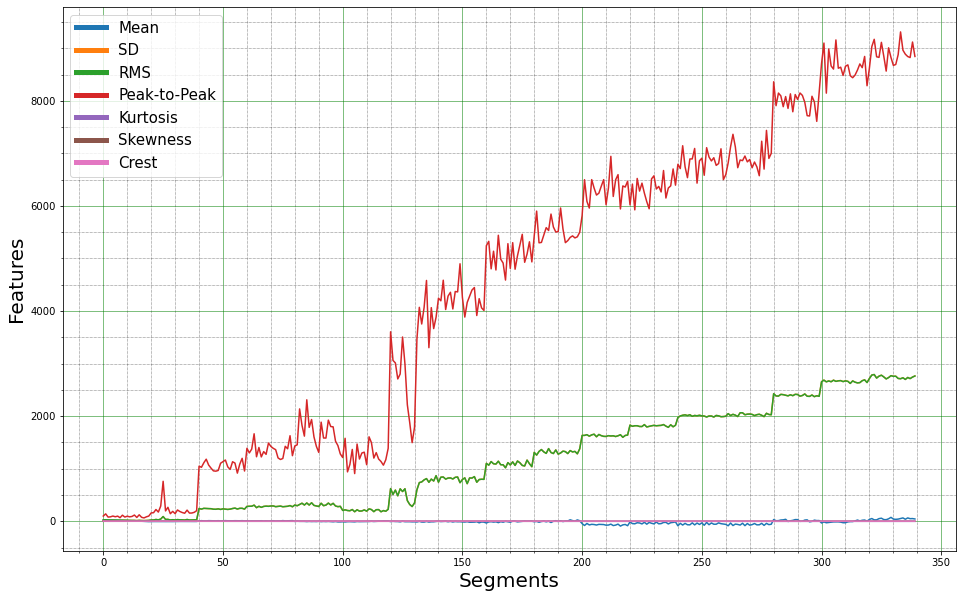

In [37]:
fig, ax = plt.subplots()
features.plot(figsize = (16,10),ax = ax)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='g')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Segments',fontsize = 20)
plt.ylabel('Features',fontsize = 20)
leg = plt.legend(loc = 2,prop = {'size':15})
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth = 5)

plt.show()

<Figure size 1440x1440 with 0 Axes>

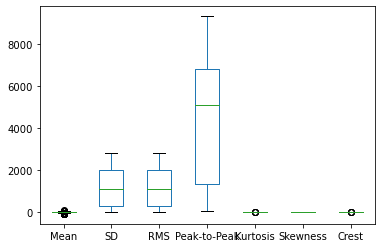

In [38]:
plt.figure(figsize = (20,20))
features.plot.box()

In [43]:
features.to_csv('features_time1.csv')